# CS6650 Homework 1 - Plot on Client Performance

## Part 1: Total elapsed time

To measure the total elapsed time. A timestamp is taken before the load test (after the server warmup) and another timestamp is taken once the load tests are finished. See sample sudo code below:

```java
// setting up environments + warm up servers

// start load test
long startTime = System.currentTimeMillis();
serverExecute(...);

// upon all tasks completions
long endTime = System.currentTimeMillis();
long elapsedTime = endTime - startTime;
System.out.println("Test completed successfully. Total time: " + elapsedTime + "ms");
```

Time data is collected below for each server run. Specification for the load tests is listed in the table below:

| Runs | Group size* | Threads per Group** | Tasks per Thread | Delay | Total Requests |
|------|--------|-----|----|--|--|
| 1 | 10 | 10 | 2000| 2s |200,000|
| 2 | 20 | 10 | 2000| 2s |400,000|
| 3 | 30 | 10 | 2000| 2s |600,000|

\* defined as `numThreadGroups` in the homework

** defined as `threadGroupSize` in the homework

Timestamp data for each wall run is recorded below:

|Server|Run 1 (ms)| Run 2 (ms)| Run 3 (ms)|
|------|--------|-----|----|
| Go (Gin) | 72640 | 130910 | 180292 |
| Tomcat | 73486 | 133553 | 186682 |

As the data suggest, go with Gin server performs faster than the tomcat server. About 2-6 seconds faster based on the transfer rate


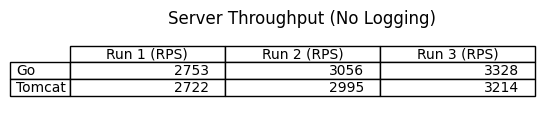

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

total_requests = [200000, 400000, 600000]
go_wall_run = [72640, 130910, 180292]
tomcat_wall_run = [73486, 133553, 186682]

throughput_go = [round(request / (time / 1000)) for request, time in zip(total_requests, go_wall_run)]
throughput_tomcat = [round(request / (time / 1000)) for request, time in zip(total_requests, tomcat_wall_run)]

# data = list(zip(throughput_go, throughput_tomcat))
data = [throughput_go, throughput_tomcat]


plt.figure(figsize=(6, 1))
plt.axis('off')
table = plt.table(cellText=data, colLabels=["Run 1 (RPS)", "Run 2 (RPS)", "Run 3 (RPS)"], rowLabels=["Go", "Tomcat"], loc='center')

plt.title("Server Throughput (No Logging)")
plt.show()

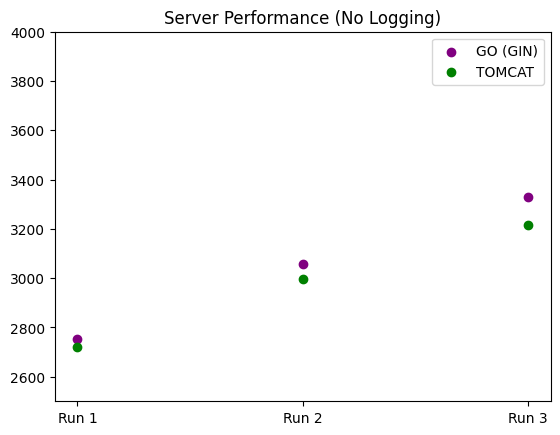

In [8]:
plt.close()

plt.title("Server Performance (No Logging)")
plt.plot()
x_scatter = ['Run 1', 'Run 2', 'Run 3']

plt.scatter(x_scatter, throughput_go, color = 'purple', label = 'GO (GIN)')
plt.scatter(x_scatter, throughput_tomcat, color = 'green', label = 'TOMCAT')
plt.ylim(2500, 4000)
plt.legend()
plt.show()

as the table and the data suggest. The server throughput remains largely the same, with some increase as the http request count increases. 

The next section will explore server performance regards to individual requests (with logging).

## Part 2: Individual Performance for Logging

Per homework instruction, invidual timestamps are added and recorded for each GET/POST request to the server. With little or no degredation in performance (5% limit per instruction), the new total elapsed time is shown below:

|Server|Run 1 (ms)| Run 2 (ms)| Run 3 (ms)|
|------|--------|-----|----|
| Go (Gin) | 72505 | 126511 | 180478 |
| Tomcat | 73466 | 128814 | 189886 |

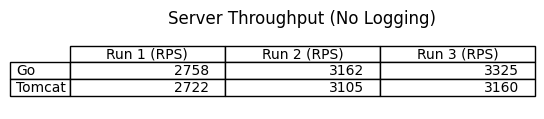

In [3]:
go_wall_run_log = [72505, 126511, 180478]
tomcat_wall_run_log = [73466, 128814, 189886]

throughput_go_log = [round(request / (time / 1000)) for request, time in zip(total_requests, go_wall_run_log)]
throughput_tomcat_log = [round(request / (time / 1000)) for request, time in zip(total_requests, tomcat_wall_run_log)]

# data = list(zip(throughput_go, throughput_tomcat))
data_log = [throughput_go_log, throughput_tomcat_log]


plt.figure(figsize=(6, 1))
plt.axis('off')
table = plt.table(cellText=data_log, colLabels=["Run 1 (RPS)", "Run 2 (RPS)", "Run 3 (RPS)"], rowLabels=["Go", "Tomcat"], loc='center')

plt.title("Server Throughput (No Logging)")
plt.show()

Just for a more side by side compairsion. Server throughput (performance is plotted side by side to see the difference): Hint--they are very close

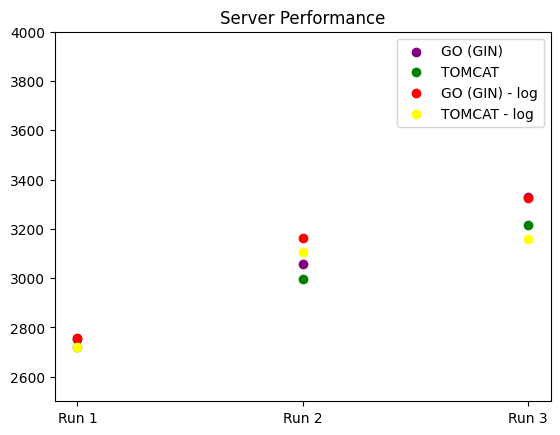

In [9]:
plt.close()

plt.title("Server Performance")
plt.plot()
x_scatter = ['Run 1', 'Run 2', 'Run 3']

plt.scatter(x_scatter, throughput_go, color = 'purple', label = 'GO (GIN)')
plt.scatter(x_scatter, throughput_tomcat, color = 'green', label = 'TOMCAT')
plt.scatter(x_scatter, throughput_go_log, color = 'red', label = 'GO (GIN) - log')
plt.scatter(x_scatter, throughput_tomcat_log, color = 'yellow', label = 'TOMCAT - log')
plt.ylim(2500, 4000)
plt.legend()
plt.show()

Now it's time to process the individual reponses. (Exciting!)

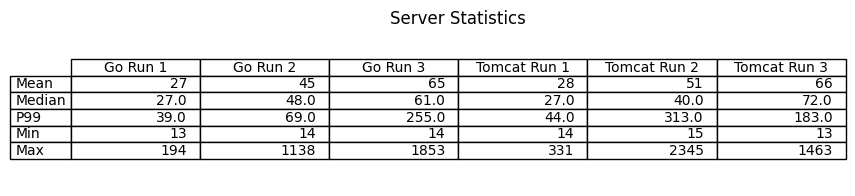

In [5]:
file_paths = ['load_test_logs_aws_go_1.csv','load_test_logs_aws_go_2.csv','load_test_logs_aws_go_3.csv',
              'load_test_logs_aws_tomcat_1.csv','load_test_logs_aws_tomcat_2.csv','load_test_logs_aws_tomcat_3.csv']

df_dict = {}
# df_tomcat_dict = {}
min_start_time = []
# min_start_time_tomcat = []
mean_response_time = []
median_response_time = []
p99_response_time = []
min_response_time = []
max_response_time = []
load_test_labels = ["Go Run 1", "Go Run 2", "Go Run 3",
                             "Tomcat Run 1", "Tomcat Run 2", "Tomcat Run 3"]

index = 0
for file_path in file_paths:
    df_dict[index] = pd.read_csv('data/' + file_path, delimiter=',')
    index+=1
    
for index in range(0,6):
    # print((df_dict[index].head()))
    min_start_time.append(min(df_dict[index]['timestamp']))
    
    mean_response_time.append(round(df_dict[index]['latency'].mean()))
    median_response_time.append(df_dict[index]['latency'].median())
    p99_response_time.append(df_dict[index]['latency'].quantile(0.99))
    min_response_time.append(df_dict[index]['latency'].min())
    max_response_time.append(df_dict[index]['latency'].max())

stats = [mean_response_time, median_response_time, p99_response_time, 
         min_response_time, max_response_time]

plt.figure(figsize=(10, 2))
plt.axis('off')
table = plt.table(cellText=stats, 
                  colLabels=load_test_labels, 
                  rowLabels=["Mean", "Median", "P99", "Min", "Max"],
                  loc='center')

plt.title("Server Statistics")
plt.show()

Now let's see the individual performance for server

<Figure size 640x480 with 0 Axes>

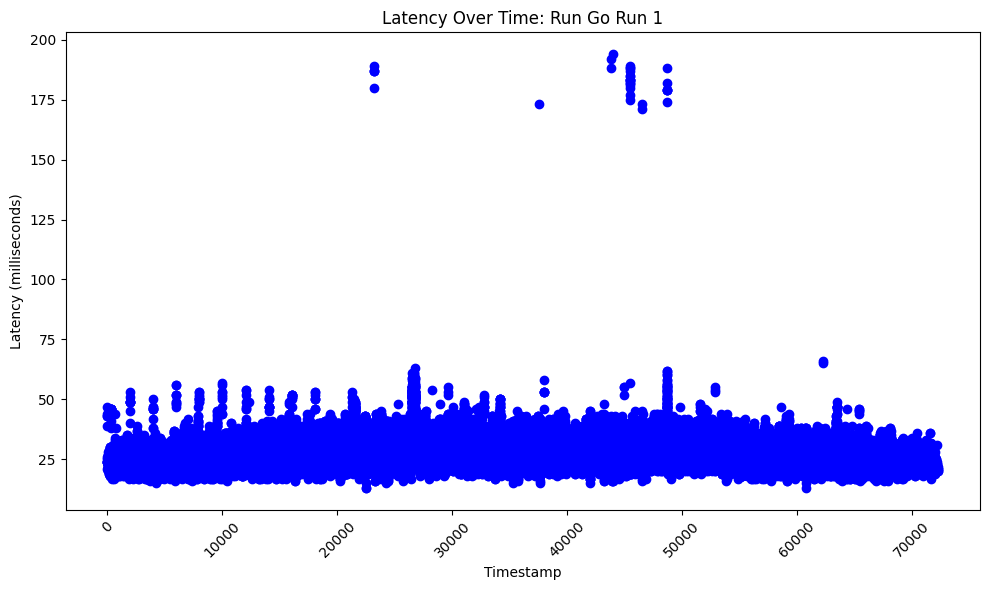

<Figure size 640x480 with 0 Axes>

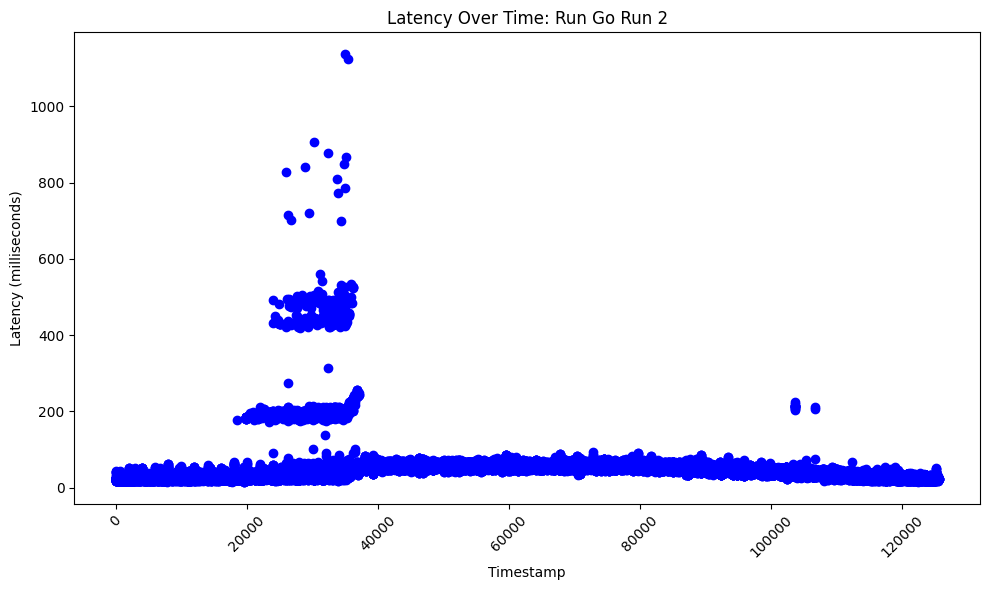

<Figure size 640x480 with 0 Axes>

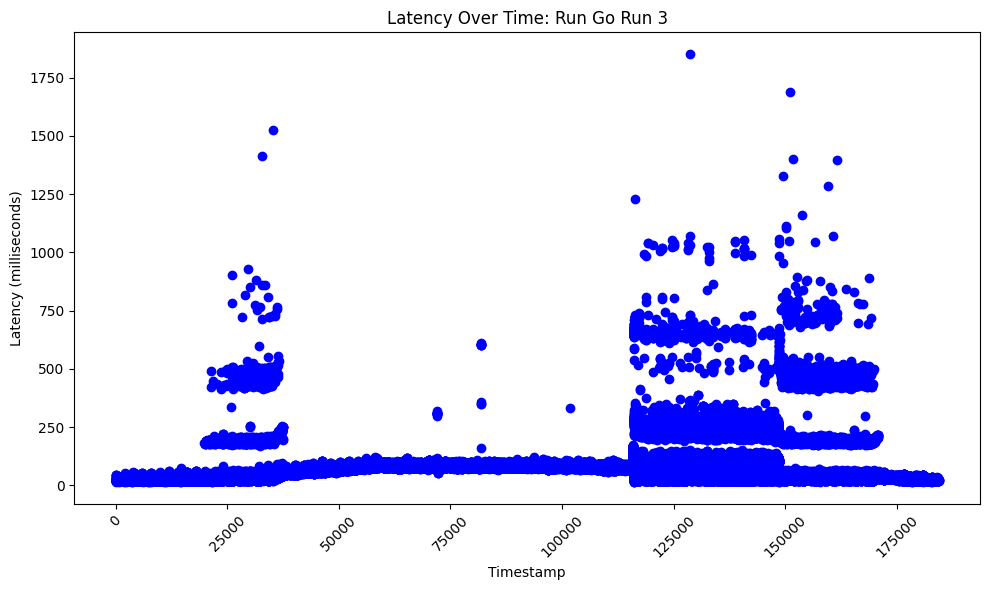

<Figure size 640x480 with 0 Axes>

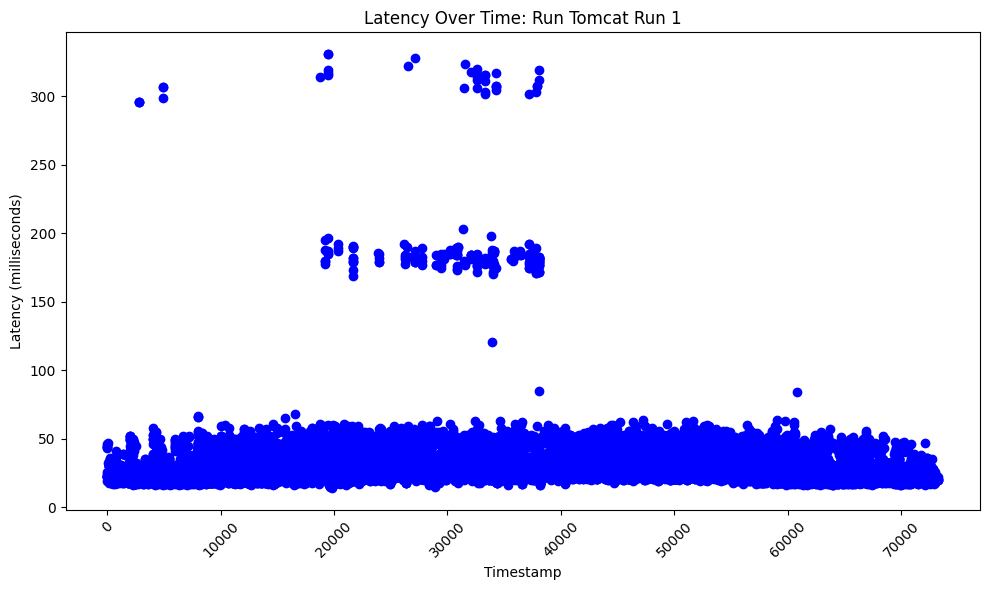

<Figure size 640x480 with 0 Axes>

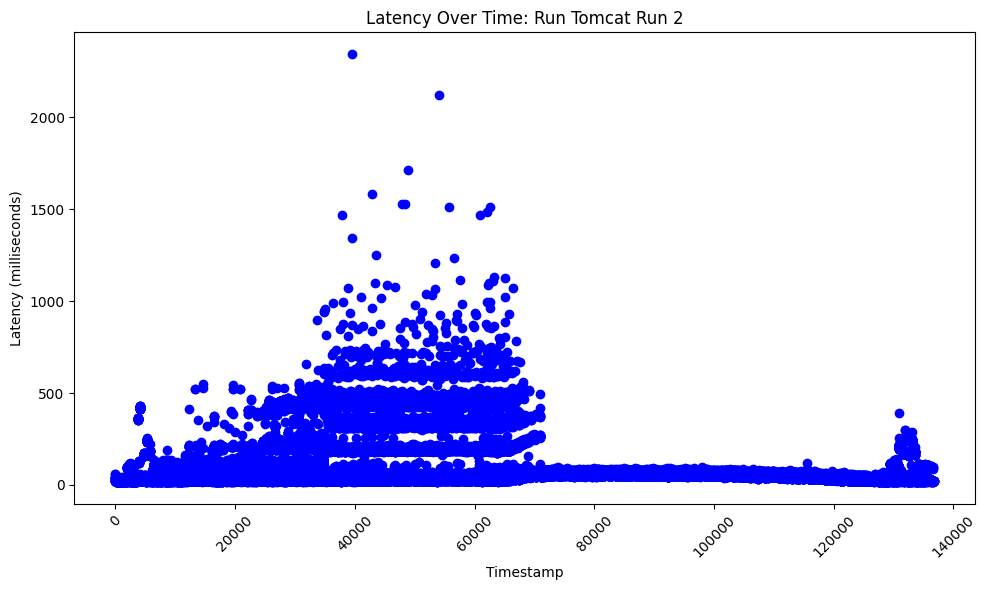

<Figure size 640x480 with 0 Axes>

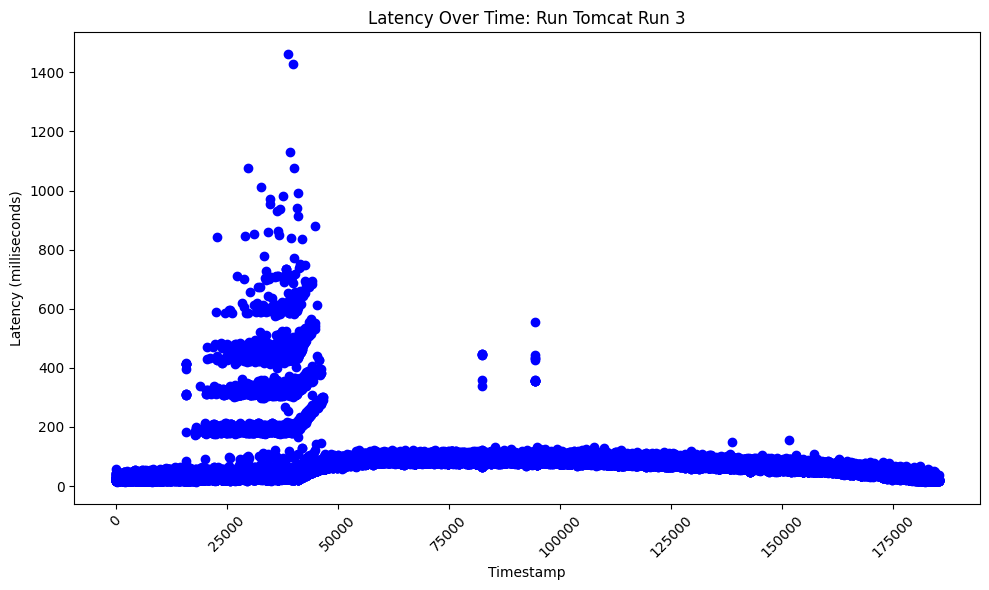

In [6]:
for index in range(1, 7):
    df_dict[index - 1]['timestamp'] = df_dict[index - 1]['timestamp'] - min_start_time[index - 1]
    
    plt.figure(index)
    plt.figure(figsize=(10, 6))
    plt.scatter(df_dict[index - 1]['timestamp'], df_dict[index - 1]['latency'], marker='o', color='b')
    plt.xlabel('Timestamp')
    plt.ylabel('Latency (milliseconds)')
    plt.title('Latency Over Time: Run ' + load_test_labels[index - 1])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

